<h1 style="font-family: Georgia, serif;font-size: 2.5em;margin-left: 3em;margin-right: 4em;"> 

---

Probabilités 2024/25 : Projet numérique

---

</h1> 

In [1]:
## Import des packages et des fonctions utiles pour le projet

#-----------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection
from math import factorial

#-----------------------------------------------------

## Vecteur de couleurs
Cat=np.array(['#F8B005','#E35704','#A92A04'])

## Fonction pour représenter les simulations
def plotSim(S,figsize=(7,7),fromAbove=True,cropSim=True):

    ## Sort by increasing time
    Sim=S.copy()
    indSort=np.argsort(Sim[:,0])
    if fromAbove==False:
        indSort=np.flip(indSort)
    Sim=Sim[indSort,:]
    
    coordinates,sizes,colors = Sim[:,1:3], Sim[:,3], Cat[Sim[:,4].astype(int)]
    
    # Calculate bottom-left corner of each rectangle to center it
    bottom_left_coords = coordinates - np.stack([sizes, sizes], axis=1)*(2**0.5)/2

    # Create the rectangles
    rectangles = [patches.Rectangle((x, y), w, h,angle=45,rotation_point='center') for (x, y), w, h in zip(bottom_left_coords, sizes*(2**0.5), sizes*(2**0.5))]

    # Create a PatchCollection and apply the colors
    collection = PatchCollection(rectangles, facecolor=colors, edgecolor='black')
    
    ## Plot
    fig,ax = plt.subplots(figsize=figsize)
    ax.add_collection(collection)
    if cropSim:
        ax.set_xlim(D[0],D[1])
        ax.set_ylim(D[0],D[1])
    else:
        ax.set_xlim(Dext[0],Dext[1])
        ax.set_ylim(Dext[0],Dext[1])
    plt.show()

## Introduction

<h1 style="font-family: Georgia, serif;font-size: 1.1em;margin-left: 3em;margin-right: 4em;"> 

---

La géométrie stochastique est une branche des probabilités qui s'intéresse à la modélisation d'objets géométriques (e.g. points, lignes, polygones,...) dont les attributs et/ou la position dans l'espace sont aléatoires. Ces modèles sont utilisés pour modéliser un grand nombre de phénomènes, comme par exemple la position des épicentres  de séismes, la positions des arbres dans une forêt, ou la disposition de fibres ou de grains dans des matériaux composites.

L'objectif de ce projet est de construire et de simuler un modèle simple de géométrie stochastique, le modèle dit des *feuilles mortes*. Il tire son nom du fait qu'il peut être vu comme une façon de modéliser des tapis de feuilles mortes sur le sol. L'idée est la suivante: on assimile les feuilles à des carrés "apparaissant" à des temps aléatoires et à des positions aléatoires sur un domaine $\mathcal{D}\subseteq \mathbb{R}^2$ (le sol). On considère également que la taille et la couleur de ces carrés sont aléatoires. En supposant que les feuilles tombent depuis un temps $t=-\infty$ et on considère l'état du domaine $\mathcal{D}$ à l'instant $t=0$ (le tapis de feuilles).

---

</h1> 

## I - Temps d'arrivée des feuilles

<h1 style="font-family: Georgia, serif;font-size: 1em;margin-left: 3em;margin-right: 4em;"> 

---

On suppose qu'on observe le tapis de feuille mortes au temps $T_0=0$ et que des feuilles sont tombées depuis un temps infini. On note ainsi $(T_{k})_{k\in\mathbb{Z}_-^*}$ la séquence des temps d'arrivée sur le sol des feuilles: $T_{-1}\le 0$ est le temps d'arrivée de la dernière feuille du tapis, $T_{-2}\le T_{-1}$ le temps d'arrivée de l'avant-dernière feuille, etc.

Afin de modéliser les temps aléatoires $(T_{-i})_{i\in\mathbb{N}^*}$ auxquels les feuilles mortes tombent sur le sol, nous recourrons à un modèle permettant de représenter des points aléatoires dans l'intervalle $I = ]-\infty, 0]$: le processus de Poisson (homogène). Ce modèle est défini de la manière suivante :

1. Pour tout $ A \in {\cal B} (]-\infty, 0])$ borné et fixé, le nombre de points $N (A)=\text{Card}\lbrace i\in\mathbb{N}^* : T_{-i} \in A\rbrace$ suit
      une loi de Poisson de paramètre $\theta \, | A |$, où $\theta \in \mathbb{R}^+$ et $|A|$ est la mesure de Lebesgue de $A$. On a donc
      $$ \mathbb{P} ( N (A) = n) = \exp \bigl( - \theta | A | \bigr) \frac{
        \bigl( \theta | A | \bigr)^n }{n!},~n \in \N $$

2. Pour tout $p\ge 2$, si $A_1,...,A_p \in {\cal B} (]-\infty, 0]) $ sont 
      disjoints deux à deux, alors $ N(A_1),...,N(A_p)$ sont 
      mutuellement indépendants.

Le paramètre $\theta$ est appelé l'intensité (ou densité) du processus de Poisson.

---

</h1> 


**Question 1.a.** Pour $i\in\mathbb{N}^*$ on pose $E_i = T_{-i +1} - T_{-i}$. Justifier que $\forall i\in\mathbb{N}^*, \tau >0,$  les événements $\lbrace E_i > \tau\rbrace$ et $\lbrace N([T_{-(i-1)}-\tau, T_{-(i-1)}[)=0\rbrace$ sont identiques, tout comme les évènements $\lbrace T_{-(i-1)}=t\rbrace$ et $ \lbrace  N([t,0[)=i-1\rbrace \cap\lbrace  N(]t,0[)=i-2 \rbrace$ pour $t<0$ et $i>1$.


**Réponse à la question 1.a**

Soient $i \in \mathbb{N}^*$ et $\tau > 0$.  
On a :  
$$
E_i > \tau \quad \Leftrightarrow \quad T_{-i} < T_{-(i-1)} - \tau
$$

Or, la suite $(T_{-j})_{j \in \mathbb{N}^*}$ est décroissante. Donc, pour tout $j \in \mathbb{N}^*$,  
$$
T_{-j} \notin [T_{-(i-1)} - \tau, T_{-(i-1)}[
$$

Cela signifie que l'intervalle $[T_{-(i-1)} - \tau, T_{-(i-1)}[$ ne contient aucun point $T_{-j}$. Ainsi :  
$$
\{E_i > \tau\} = \{N([T_{-(i-1)} - \tau, T_{-(i-1)}[) = 0\}
$$

**Deuxième égalité**

Supposons que $(T_{-j})_{j \in \mathbb{N}^*}$ est strictement décroissante (ce qui est vrai presque sûrement). Pour $t < 0$ et $i > 1$, on a :  
$$
\{T_{-(i-1)} = t\} = \{\forall j \in \mathbb{N}^*, T_{-j} > t \Leftrightarrow j < i-1\} \cap \{\forall j \in \mathbb{N}^*, T_{-j} \geq t \Leftrightarrow j \leq i-1\}
$$

L'inclusion est vraie par sricte décroissance de la suite. Pour la réciproque, il suffit de considérer $j=i-1$ : on obtient, si l'événement est vérifié, $T_{-(i-1)}\ge t$ vraie et $T_{-(i-1)}>t$ fausse, d'où $T_{-(i-1)}=t$ par antisymétrie.
Or, on a :
$$
\lbrace\forall j \in \mathbb{N}^*, T_{-j}>t \leftrightarrow j<i-1\rbrace = \lbrace  N([t,0[)=i-1\rbrace
$$
et
$$
\lbrace\forall j \in \mathbb{N}^*, T_{-j}\ge t \leftrightarrow j \le i-1\rbrace = \lbrace  N(]t,0[)=i-2 \rbrace
$$
car $\forall j \in \mathbb{N}^*, T_{-j}<0$ et par décroissance de la suite

Ainsi, on obtient :  
$$
\{T_{-(i-1)} = t\} = \{N([t, 0[) = i-1\} \cap \{N(]t, 0[) = i-2\}
$$

**Question 1.b.** En déduire que $\forall i\in\mathbb{N}^*$, $E_i$ suit une loi exponentielle de paramètre $\theta$.

*Indication: Pour $i>1$, on pourra passer par le calcul de $\mathbb{P}(N([T_{-(i-1)}-\tau, T_{-(i-1)}[)=0)$ et utiliser le théorème de l'espérance totale pour calculer cette probabilité (la définition de la loi de $N(A)$ n'étant valable a priori que pour des boréliens $A$ déterministes/fixés).* 

**Réponse à la question 1.b.**

On sait que pour tout $i \in \mathbb{N}^*$, les événements $\{E_i > \tau\}$ et $\{N([T_{-(i-1)} - \tau, T_{-(i-1)}[) = 0\}$ sont identiques. De plus, pour $i > 1$, les événements $\{T_{-(i-1)} = t\}$ et $\{N([t, 0[) = i-1\} \cap \{N(]t, 0[) = i-2\}$ sont également identiques.

Pour calculer $\mathbb{P}(E_i > \tau)$, on utilise le théorème de l'espérance totale. On a :

$$
\mathbb{P}(E_i > \tau) = \mathbb{E}\left[\mathbb{P}(N([T_{-(i-1)} - \tau, T_{-(i-1)}[) = 0 \mid T_{-(i-1)})\right].
$$

Comme $N([T_{-(i-1)} - \tau, T_{-(i-1)}[)$ suit une loi de Poisson de paramètre $\theta \tau$ (car la mesure de Lebesgue de $[T_{-(i-1)} - \tau, T_{-(i-1)}[$ est $\tau$), on a :

$$
\mathbb{P}(N([T_{-(i-1)} - \tau, T_{-(i-1)}[) = 0 \mid T_{-(i-1)}) = e^{-\theta \tau}.
$$

Ainsi,

$$
\mathbb{P}(E_i > \tau) = \mathbb{E}\left[e^{-\theta \tau}\right] = e^{-\theta \tau}.
$$

Cela montre que la fonction de survie de $E_i$ est celle d'une loi exponentielle de paramètre $\theta$. Par conséquent, pour tout $i \in \mathbb{N}^*$, $E_i$ suit une loi exponentielle de paramètre $\theta$.

**Question 1.c.** Soit $n\in\mathbb{N}$ où $n\ge 2$, et soient $e_1, \dots, e_{n-1} \in \R_+$. Montrer que $\mathbb{P}(E_n>\tau\vert E_1=e_1, \dots, E_{n-1}=e_{n-1} ) = \mathbb{P}(E_n>\tau)$. 

*Indication: On pourra poser  $\mathcal{H}_{n-1} = \lbrace E_1=e_1, \dots, E_{n-1}=e_{n-1}\rbrace$ et exprimer $\mathcal{H}_{n-1}$ en fonction des variables $T_{-i}$.* 

**Réponse à la question 1.c.**

Posons $\mathcal{H}_{n-1} = \lbrace E_1=e_1, \dots, E_{n-1}=e_{n-1}\rbrace$

Par définition des temps inter-arrivées $E_i = T_{-(i-1)} - T_{-i}$ et en utilisant $T_0 = 0$, on obtient par récurrence immédiate :  
$$
\mathcal{H}_{n-1} = \lbrace T_{-1} = -e_1, T_{-2} = -e_1 -e_2, \dots , T_{-(n-1)} = -\sum_{i=1}^{n-1} e_i\rbrace
$$
Pour tout $k\in \llbracket 1,n-1 \rrbracket $, posons :
$$
A_{2k} = \lbrace -\sum_{i=1}^{k} e_i \rbrace
$$
$$
A_{2k-1} = ]-\sum_{i=1}^{k} e_i, \sum_{i=1}^{k-1} e_i [,
$$
$$
B = ]-\sum_{i=1}^{n-1} e_i - \tau, -\sum_{i=1}^{n-1} e_i[
$$

D'après la question **1.a**, on a :  
$$
\mathbb{P}(E_n > \tau \mid \mathcal{H}_{n-1}) = \mathbb{P}(N(B) = 0 \mid \mathcal{H}_{n-1}).
$$

Or, $\mathcal{H}_{n-1}$ peut s'exprimer en termes de $N(A_l)$ :  
$$
\mathcal{H}_{n-1} = \{\forall k \in \llbracket 1, n-1 \rrbracket, N(A_{2k}) = 1, N(A_{2k-1}) = 0\}.
$$

Les ensembles $A_l$ et $B$ sont disjoints deux à deux. Par indépendance des variables de Poisson $N(A_l)$ et $N(B)$, on a :  
$$
\mathbb{P}(N(B) = 0 \mid \mathcal{H}_{n-1}) = \mathbb{P}(N(B) = 0) = e^{-\theta \tau}.
$$

Ainsi,  
$$
\mathbb{P}(E_n > \tau \mid E_1 = e_1, \dots, E_{n-1} = e_{n-1}) = \mathbb{P}(E_n > \tau).
$$

D'après la question **1.b**, $\mathbb{P}(E_n > \tau) = e^{-\theta \tau}$, ce qui conclut la démonstration.

**Question 1.d.** En déduire que la suite $(E_i)_{i\in\mathbb{N}^*} $ est une suite de variables aléatoires indépendantes, toutes de loi exponentielle de paramètre $\theta$.

**Réponse à la question 1.d.**

On en déduit que la suite $(E_i)_{i \in \mathbb{N}^*}$ est une suite de variables aléatoires indépendantes, toutes de loi exponentielle de paramètre $\theta$. En effet :

1. D'après la question **1.b**, chaque $E_i$ suit une loi exponentielle de paramètre $\theta$.
2. D'après la question **1.c**, les variables $E_i$ sont indépendantes, car la probabilité conditionnelle $\mathbb{P}(E_n > \tau \vert E_1 = e_1, \dots, E_{n-1} = e_{n-1})$ ne dépend pas des valeurs de $E_1, \dots, E_{n-1}$.

Ainsi, $(E_i)_{i \in \mathbb{N}^*}$ est une suite de variables aléatoires indépendantes et identiquement distribuées (i.i.d.) de loi exponentielle de paramètre $\theta$.

**Question 1.dbis.(Bonus)** Montrer que inversement, si $(E_i)_{i\in\mathbb{N}^*} $ est une suite de variables aléatoires indépendantes, toutes de loi exponentielle de paramètre $\theta$, alors la suite $(T_{-i})_{i\in\mathbb{N}^*}$ telle que $E_i = T_{-i +1} - T_{-i}$ définit un processus de Poisson sur $]-\infty, 0[$.

**Réponse à la question 1.dbis.(Bonus)$**

Par définition,pour tout $i \geq 1$ :
$$
T_{-i} = -\sum_{k=1}^i E_k.
$$
Les $E_i$ étant indépendants et exponentiels de paramètre $\theta$, les $T_{-i}$ suivent une loi Gamma $\Gamma(i, \theta)$ (somme de $i$ exponentielles indépendantes).

1. **Première propriété**
Soit $A = [a, 0] \subseteq ]-\infty, 0[$ avec $a < 0$. Le nombre de points $N(A)$ dans $A$ est :
$$
N(A) = \text{Card}\{i \in \mathbb{N}^* \mid T_{-i} \in A\} = \text{Card}\{i \in \mathbb{N}^* \mid -\sum_{k=1}^i E_k \in [a, 0]\}.
$$
En posant $t = |a| > 0$, cela revient à :
$$
N(A) = \text{Card}\{i \in \mathbb{N}^* \mid \sum_{k=1}^i E_k \leq t\}.
$$

Or, pour $n \in \mathbb{N}$, on a :
$$
\mathbb{P}(N(A) = n) =\mathbb{P}\left(S_n \leq t \leq S_n + E_{n+1}\right) =  \mathbb{P}\left(\sum_{k=1}^n E_k \leq t < \sum_{k=1}^{n+1} E_k\right).
$$
Comme $E_i \sim \mathcal{E}(\theta)$, la somme $\sum_{k=1}^n E_k$ suit une loi $\Gamma(n, \theta)$. En calculant cette probabilité via la convolution des exponentielles :
$$
\mathbb{P}(N(A) = n) =\int_0^t f_{S_n}(s) \mathbb{P}(E_{n+1} > t - s) \, \mathrm{d}s =  \int_0^t \frac{\theta^n s^{n-1} e^{-\theta s}}{(n-1)!} \cdot e^{-\theta (t - s)} \, \mathrm{d}s = \frac{(\theta t)^n}{n!} e^{-\theta t}.
$$
On retrouve la loi de Poisson $\mathcal{P}(\theta t)$.


2. **Deuxième propriété**
Soient $A = [a, b]$ et $B = [c, d]$ deux intervalles disjoints dans $]-\infty, 0[$, avec $a < b < c < d < 0$.  
Les comptages $N(A)$ et $N(B)$ dépendent de blocs distincts de variables $E_i$ :
  -  $N(A)$ dépend des $E_1, \dots, E_k$.
  -  $N(B)$ dépend des $E_{k+1}, E_{k+2}, \dots$, avec $S_i - S_k \in [|d| - |b|, |c| - |b|]$.

Comme les $E_i$ sont indépendants, les blocs $\{E_1, \dots, E_k\}$ et $\{E_{k+1}, E_{k+2}, \dots\}$ le sont aussi. Ainsi, $N(A)$ et $N(B)$ sont des fonctions de variables indépendantes, donc indépendants.


On généralise avec p intervalles disjoints. Soient $A_1 = [a_1, b_1], \dots, A_p = [a_p, b_p]$ des intervalles disjoints et ordonnés dans $]-\infty, 0[$, avec $a_1 < b_1 < a_2 < b_2 < \dots < a_p < b_p < 0$.  
- Chaque comptage $N(A_j)$ dépend d’un bloc temporel distinct de $E_i$, séparé par les bornes des intervalles.
- Ces blocs sont indépendants car les $E_i$ le sont.
Ainsi, 
$$
N(A_1), \dots, N(A_p) \text{ sont indépendants}.
$$

**Conclusion**
Les deux propriétés fondamentales étant vérifiées :
1. $N(A) \sim \mathcal{P}(\theta |A|)$ pour tout $A$ borné,
2. Indépendance pour des intervalles disjoints,

la suite $(T_{-i})_{i \in \mathbb{N}^*}$ définit bien un processus de Poisson homogène sur $]-\infty, 0[$ d’intensité $\theta$.

**Question 1.e.**  Implémenter une fonction qui, étant données une valeur $t_{\min}<0$ et une valeur de $\theta$, permet de simuler les temps d'arrivée des feuilles tombant dans l'intervalle $[t_{\min},0[$, i.e. les variables $(T_{-i})_{i\in\mathbb{N}^*}$ telles que $T_{-i} \in [t_{\min},0[$. On veillera à ce que les temps d'arrivées soient retournés un vecteur trié dans l'ordre croissant.

In [2]:
def simTempsArrivee(t_min, theta):
    T = [0]  # On commence à T_0 = 0 et on va remonter dans le temps
    while True:
        E = np.random.exponential(scale=1/theta) 
        T_new = T[-1] - E  
        if T_new < t_min:  
            break
        T.append(T_new)
    
    return np.array(T[::-1])  

## II - Caractéristiques des feuilles

<h1 style="font-family: Georgia, serif;font-size: 1em;margin-left: 3em;margin-right: 4em;"> 


---

Dans la suite du projet, on pose $\mathcal{D}=[-1,1]\times [-1,1]$ et $\mathcal{D}_{ext}=[-2,2]\times[-2,2]$.


On passe maintenant à la modélisation des caractéristiques des feuilles $F$, à savoir leur position, leur couleur et leur taille.

Comme indiqué en introduction, les feuilles sont assimilées à des carrés de $\mathbb{R}^2$. En particulier, on suppose que toutes les feuilles tombent avec la même orientation: on peut donc assimiler ces feuilles/carrés à des ''boules'' (fermées) pour la norme $\Vert\cdot\Vert_1$ définie par $\Vert x\Vert_1 = \vert x_1\vert + \vert x _2\vert$, $x=(x_1,x_2)\in\mathbb{R}^2$. Ainsi chaque feuille $F$ est en somme une boule de centre $\chi(F)\in\mathbb{R}^2$ et de rayon $\rho(F)>0$ aléatoires.

La position d'une feuille $F$ sur le sol est spécifiée par le centre $\chi(F)\in\mathbb{R}^2$ du carré/de la boule correspondant(e). On suppose que les feuilles tombent uniformément dans $\mathcal{D}_{ext}$, i.e. $\chi(F)\sim \mathcal{U}(\mathcal{D}_{ext})$.

La taille d'une feuille $F$ est spécifiée par le rayon $\rho(F)>0$ de la boule correspondante. Ce rayon suit une loi qui sera précisée plus tard, mais on suppose que la taille des feuilles est bornée par $1/2$, de sorte que seules les feuilles tombant dans $\mathcal{D}_{ext}$ intersectent la zone d'étude $\mathcal{D}$. 

On représente ci-dessous une feuille $F$ pour fixer les idées.

</h1> 

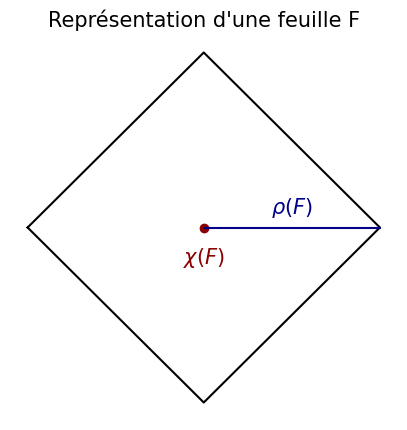

In [4]:
## Figure représentant une feuille F
fig,ax=plt.subplots(figsize=(5,5))
ax.plot([-1,0,1,0,-1],[0,1,0,-1,0],color="black")
ax.plot([0,1],[0,0],color="darkblue")
ax.scatter(0,0,color="darkred")
ax.text(-0.,-0.1,r"$\chi(F)$",fontsize=15,ha='center', va='top',color="darkred")
ax.text(0.5,0.05,r"$\rho(F)$",fontsize=15,ha='center', va='bottom',color="darkblue")
ax.set_title("Représentation d'une feuille F",fontsize=15)
ax.axis('off')
plt.show()


<h1 style="font-family: Georgia, serif;font-size: 1em;margin-left: 3em;margin-right: 4em;"> 

La couleur d'une feuille $F$ est quant à elle modélisée par un entier $c(F)\in\lbrace 0,...,N_c-1\rbrace$ où $N_c$ désigne le nombre de couleurs possibles. La probabilité qu'une feuille soit de couleur $k$ est notée $\mathbb{P}(c(F)=k)=p_k\in[0,1]$ et on a $\sum_{k=0}^{N_c-1}p_k=1$.

Enfin, on considère que les caractéristiques (position, taille, couleur) d'une feuille sont indépendantes de son temps d'arrivée.
Ainsi, si on note $F$ une feuille arrivant à un des temps $T_{-i}$, $i\in\mathbb{N}^*$, alors $\chi(F)$,  $c(F)$ et $\rho(F)\in ]0,1/2[$  sont des variables aléatoires indépendantes de $T_{-i}$. 
On supposera également que  $\chi(F)$ est indépendante de $c(F)$ et $\rho(F)$, et que la loi de $\rho(F)$ dépend de la couleur $c(F)$ de la feuille.

---

</h1> 

**Question 2.a.** Soit $x_0 \in\mathcal{D}$ quelconque. Montrer que la probabilité qu'une feuille $F$ de couleur $c(F)=i\in\lbrace 0,\dots,N_c-1\rbrace$ et de taille $\rho(F)=r\in]0,1/2[$ recouvre le point $x_0$ est donnée par
$$
\begin{aligned}
P(x_0\in F \;\vert\; c(F)=i,\; \rho(F)=r)
=\frac{\vert B_1(x_0, r)\vert }{\vert \mathcal{D}\vert}
=\frac{r^2 }{8}
\end{aligned}
$$

**Réponse à la question 2.a.** 

Calculons la probabilité :
$$
p = \mathbb{P}(x_0\in F \;\vert\; c(F)=i,\; \rho(F)=r)
$$
Sachant que $\chi(F)$ est indépendant de $c(F)$ et $\rho(F)$, on a :

$$
p = \mathbb{P}(||\Chi(F)-x_0||_1 \le \rho(F) \;\vert\; c(F)=i, \rho(F)=r) = \mathbb{P}(||\Chi(F)-x_0||_1 \le r \;\vert\; c(F)=i, \rho(F)=r) =  \mathbb{P}(||\Chi(F)-x_0||_1 \le r)
$$

Il vient :
$$
p = \mathbb{P}(||x_0 - \Chi(F)||_1 \le r) = \mathbb{P}(\Chi(F) \in B_{||.||_1}(x_0,r))
$$
Cette probabilité correspond au rapport entre l'aire de la boule $B_{\|\cdot\|_1}(x_0, r)$ et l'aire de $\mathcal{D}_{ext}$ :
$$
p = \frac{\text{Aire}(B_{\|\cdot\|_1}(x_0, r))}{|\mathcal{D}_{ext}|}
$$

- **Aire de la boule** :  
  La boule $B_{\|\cdot\|_1}(x_0, r)$ est un carré tourné de diagonale $2r$. Son aire est :
  $$
  \text{Aire}(B_{\|\cdot\|_1}(x_0, r)) = 2r^2
  $$

- **Aire de $\mathcal{D}_{ext}$** :  
  $$
  |\mathcal{D}_{ext}| = (4)^2 = 16
  $$

Finalement :
$$
p = \frac{2r^2}{16} = \frac{r^2}{8}
$$

**Question 2.b.** Montrer que la probabilité qu'une feuille $F$ de couleur $i$  recouvre le point $x_0 \in\mathcal{D}$ est donnée par
$$
\begin{aligned}
\mathbb{P}(c(F)=i, x_0\in F)
&=\frac{p_ir_i^2}{8}
\end{aligned}
$$
où on note $p_i = \mathbb{P}(c(F)=i) $ et $r_i^2=\mathbb{E}\big[\rho(F)^2 \,\big\vert c(F)=i\big]$.


**Réponse à la question 2.b.**

La probabilité $\mathbb{P}(c(F) = i, x_0 \in F)$ peut être exprimée en utilisant la loi des probabilités totales en conditionnant par rapport à la taille $\rho(F)$ de la feuille :

$$
\mathbb{P}(c(F) = i, x_0 \in F) = \mathbb{E}\left[\mathbb{P}(x_0 \in F \;\vert\; c(F) = i, \rho(F))\right] \cdot \mathbb{P}(c(F) = i).
$$

En effet, la loi des probabilités totales pour des variables aléatoires continues s'écrit :

$$
\mathbb{P}(A) = \int \mathbb{P}(A \mid X = x) \, f_X(x) \, dx,
$$

où $f_X$ est la densité de probabilité de $X$. Ici, on conditionne par rapport à $\rho(F)$, et on intègre sur toutes les valeurs possibles de $\rho(F)$. Ainsi :

$$
\mathbb{P}(c(F) = i, x_0 \in F) = \int \mathbb{P}(x_0 \in F \;\vert\; c(F) = i, \rho(F) = r) \cdot f_{\rho(F) \mid c(F) = i}(r) \, dr \cdot \mathbb{P}(c(F) = i).
$$

Cela revient à écrire :

$$
\mathbb{P}(c(F) = i, x_0 \in F) = \mathbb{E}\left[\mathbb{P}(x_0 \in F \;\vert\; c(F) = i, \rho(F))\right] \cdot \mathbb{P}(c(F) = i).
$$


D'après la question **2.a**, on sait que pour une feuille $F$ de couleur $i$ et de taille $\rho(F) = r$, la probabilité que $x_0 \in F$ est :

$$
\mathbb{P}(x_0 \in F \;\vert\; c(F) = i, \rho(F) = r) = \frac{r^2}{8}.
$$

Ainsi, on a :

$$
\mathbb{E}\left[\mathbb{P}(x_0 \in F \;\vert\; c(F) = i, \rho(F))\right] = \mathbb{E}\left[\frac{\rho(F)^2}{8} \;\Big\vert\; c(F) = i\right].
$$

Par définition de l'espérance conditionnelle, on a :

$$
\mathbb{E}\left[\rho(F)^2 \;\Big\vert\; c(F) = i\right] = r_i^2,
$$

où $r_i^2 = \mathbb{E}\big[\rho(F)^2 \,\big\vert c(F) = i\big]$.

En combinant les résultats, on obtient :

$$
\mathbb{P}(c(F) = i, x_0 \in F) = \frac{r_i^2}{8} \cdot p_i = \frac{p_i r_i^2}{8}.
$$

ce qui conclut la démonstration.

**Question 2.c.** En déduire que  la probabilité qu'une feuille $F$ recouvre le point $x_0 \in\mathcal{D}$ est donnée par
$$
\begin{aligned}
\mathbb{P}(x_0\in F)
&=\frac{1}{8}\sum_{j=0}^{N_c-1} p_jr_j^2
\end{aligned}
$$
et que la probabilité qu'une feuille $F$ soit de couleur $i$  sachant qu'elle recouvre le point $x_0 \in\mathcal{D}$ est donnée par
$$
\begin{aligned}
\mathbb{P}(c(F)=i \vert x_0\in F)
&=\frac{p_ir_i^2}{\sum_{j=0}^{N_c-1} p_jr_j^2}
\end{aligned}
$$

**Réponse à la question 2.c.**

Les évènements $c(F)=i, i\in \llbracket 1,N_c-1 \rrbracket$ formant un système complet d'événements. D'après la question **2.b.**, on a :
$$
\mathbb{P}(x_0 \in F) = \sum_{j=0}^{N_c-1}\mathbb{P}(x_0 \in F, c(F)=j) = \frac{1}{8}\sum_{j=0}^{N_c-1}p_jr_j^2
$$
Cette probabilité est donc non nulle. En utilisant la formule de Bayes, on peut écrire :

$$
\mathbb{P}(c(F)=i \;\vert\; x_0\in F) = \frac{\mathbb{P}(c(F)=i)}{\mathbb{P}(x_0 \in F)}\mathbb{P}(x_0\in F \;\vert\; c(F) = i)
$$
ce qui donne, d'après les résultats précédents :
$$
\mathbb{P}(c(F)=i \;\vert\; x_0\in F) = \frac{8p_i}{\sum_{j=0}^{N_c-1}p_jr_j^2}\times\frac{r_i^2}{8} = \frac{p_ir_i^2}{\sum_{j=0}^{N_c-1}p_jr_j^2}
$$
ce qui conclut la démonstration. 

<h1 style="font-family: Georgia, serif;font-size: 1em;margin-left: 3em;margin-right: 4em;"> 

---

**Remarque:** Soit $C(x_0)\in\lbrace 0,\dots,N_c-1\rbrace$ la couleur de la feuille recouvrant le point $x_0\in\mathcal{D}$  au temps $T_0=0$. $C(x_0)$ correspond donc à la couleur de la dernière feuille recouvrant $x_0$.  On note que puisque les couleurs des feuilles sont tirées indépendamment de leurs temps d'arrivée, la distribution de la couleur de la dernière feuille recouvrant le point $x_0$ est la même que la distribution de la couleur de n'importe quelle autre feuille recouvrant $x_0$, à savoir $\mathbb{P}(c(F)= \cdot ~ \vert x_0\in F)$. On peut dès lors conclure que

$$
\begin{aligned}
\mathbb{P}(C(x_0)=i)=\mathbb{P}(c(F)=i \vert x_0\in F) = \frac{p_ir_i^2}{\sum_{j=0}^{N_c} p_jr_j^2}, \quad i\in \lbrace 0,\dots,N_c-1\rbrace.
\end{aligned}
$$

---

</h1 style="font-family: Georgia, serif;font-size: 1em;margin-left: 3em;margin-right: 4em;"> 

**Question 2.cbis.(Bonus).**  Soit $\tilde N(x_0,\tau)$ le nombre de feuilles recouvrant le point $x_0$ et étant tombées dans l'intervalle de temps $[-\tau,0[$. Montrer que $ \tilde N(x_0,\tau)$ suit une loi de Poisson de paramètre $\tilde\theta\tau$ avec 

$$\tilde\theta=\frac{\theta}{8}\sum_{j=0}^{N_c-1} p_jr_j^2$$

*Indication: On pourra introduire la variable $\tilde N(\tau)$ donnant le nombre total de feuilles tombées  dans l'intervalle de temps $[-\tau,0[$ (quelle que soit leur couleur ou leur position).*

**Réponse à la question 2.cbis.(Bonus)**

Notons $\tilde{N}(\tau)$ le nombre total de feuilles tombées dans $[-\tau, 0[$, quelle que soit leur couleur ou position.  
D'après le modèle des feuilles mortes, $\tilde{N}(\tau)$ suit une **loi de Poisson** de paramètre $\theta \tau$ :
$$
\tilde{N}(\tau) \sim \mathcal{P}(\theta \tau).
$$

D'après la **question 2.c**, chaque feuille tombée dans $[-\tau, 0[$ :
1. Recouvre $x_0$ avec probabilité $p = \frac{1}{8} \sum_{j=0}^{N_c-1} p_j r_j^2$.
2. Ne recouvre pas $x_0$ avec probabilité $1 - p$.

Les feuilles étant indépendantes, on peut écrire :
$$
\tilde{N}(x_0, \tau) = \sum_{k=1}^{\tilde{N}(\tau)} \mathbf{1}_{\{x_0 \in F_k\}}.
$$

On calcule $\mathbb{P}(\tilde{N}(x_0, \tau) = m)$ pour $m \in \mathbb{N}$ :
$$
\mathbb{P}(\tilde{N}(x_0, \tau) = m) = \sum_{n=m}^{\infty} \mathbb{P}(\tilde{N}(\tau) = n) \cdot \mathbb{P}\left(\sum_{k=1}^n \mathbf{1}_{\{x_0 \in F_k\}} = m\right).
$$
Or :
- $\mathbb{P}(\tilde{N}(\tau) = n) = e^{-\theta \tau} \frac{(\theta \tau)^n}{n!}$ (loi de Poisson).
- $\mathbb{P}\left(\sum_{k=1}^n \mathbf{1}_{\{x_0 \in F_k\}} = m\right) = \binom{n}{m} p^m (1-p)^{n-m}$ (loi binomiale).

En combinant :
$$
\mathbb{P}(\tilde{N}(x_0, \tau) = m) = \sum_{n=m}^{\infty} e^{-\theta \tau} \frac{(\theta \tau)^n}{n!} \cdot \binom{n}{m} p^m (1-p)^{n-m}.
$$

Factorisons $e^{-\theta \tau} p^m / m!$ et posons $k = n - m$ :
$$
\mathbb{P}(\tilde{N}(x_0, \tau) = m) = e^{-\theta \tau} \frac{(\theta \tau p)^m}{m!} \sum_{k=0}^{\infty} \frac{(\theta \tau (1-p))^k}{k!}.
$$

La somme est la série exponentielle :
$$
\sum_{k=0}^{\infty} \frac{(\theta \tau (1-p))^k}{k!} = e^{\theta \tau (1-p)}.
$$

Ainsi :
$$
\mathbb{P}(\tilde{N}(x_0, \tau) = m) = e^{-\theta \tau p} \frac{(\theta \tau p)^m}{m!}.
$$

On reconnaît la loi de Poisson de paramètre $\theta \tau p$ :
$$
\tilde{N}(x_0, \tau) \sim \mathcal{P}\left(\theta \tau \cdot \frac{1}{8} \sum_{j=0}^{N_c-1} p_j r_j^2\right).
$$

En posant $\tilde{\theta} = \frac{\theta}{8} \sum_{j=0}^{N_c-1} p_j r_j^2$, on obtient finalement :
$$
\tilde{N}(x_0, \tau) \sim \mathcal{P}(\tilde{\theta} \tau).
$$

**Question 2.d.** En déduire que la probabilité qu'aucune feuille ne recouvre le point $x_0\in\mathcal{D}$ au temps $T_0=0$ est nulle (en pensant à bien justifier d'éventuels passages à la limite).

**Réponse à la question 2.d.**

D'après la question **2.cbis.(Bonus)**, le nombre de feuilles recouvrant $x_0$ et tombées dans l'intervalle de temps $[-\tau, 0[$ suit une loi de Poisson de paramètre $\tilde{\theta} \tau$, où:

$$
\tilde{\theta} = \frac{\theta}{8} \sum_{j=0}^{N_c-1} p_j r_j^2.
$$

La probabilité qu'aucune feuille ne recouvre $x_0$ dans l'intervalle $[-\tau, 0[$ est donnée par la probabilité que $N(x_0, \tau) = 0$, où $N(x_0, \tau)$ suit une loi de Poisson de paramètre $\tilde{\theta} \tau$. Ainsi :

$$
\mathbb{P}(N(x_0, \tau) = 0) = e^{-\tilde{\theta} \tau}.
$$

On s'intéresse à la probabilité qu'aucune feuille ne recouvre $x_0$ au temps $T_0 = 0$. Comme les feuilles tombent depuis un temps infini ($\tau \to +\infty$), on fait tendre $\tau$ vers $+\infty$ dans l'expression précédente :

$$
\lim_{\tau \to +\infty} \mathbb{P}(N(x_0, \tau) = 0) = \lim_{\tau \to +\infty} e^{-\tilde{\theta} \tau}.
$$

Or, $\tilde{\theta} > 0$ (car $\theta > 0$ et $\sum_{j=0}^{N_c-1} p_j r_j^2 > 0$), donc :

$$
\lim_{\tau \to +\infty} e^{-\tilde{\theta} \tau} = 0.
$$

Pour justifier rigoureusement que :

$$
\mathbb{P}(\text{Aucune feuille ne recouvre } x_0) = \lim_{\tau \to +\infty} \mathbb{P}(N(x_0, \tau) = 0),
$$

on utilise le **théorème de continuité décroissante** des probabilités. En effet :

1. L'événement $\{\text{Aucune feuille ne recouvre } x_0\}$ est équivalent à l'intersection décroissante des événements $\{N(x_0, \tau) = 0\}$ lorsque $\tau \to +\infty$.
2. Par le théorème de continuité décroissante, on a :

$$
\mathbb{P}\left(\bigcap_{\tau > 0} \{N(x_0, \tau) = 0\}\right) = \lim_{\tau \to +\infty} \mathbb{P}(N(x_0, \tau) = 0).
$$

Ainsi, on obtient :

$$
\mathbb{P}(\text{Aucune feuille ne recouvre } x_0) = \lim_{\tau \to +\infty} \mathbb{P}(N(x_0, \tau) = 0) = 0.
$$
ce qui conclut la démonstration.

<h1 style="font-family: Georgia, serif;font-size: 1em;margin-left: 3em;margin-right: 4em;"> 

---

On considère que la taille $\rho(F)$ d'une feuille dépend de la couleur $c(F)$ de la feuille comme suit: si la couleur de la feuille est $c(F)=i\in\lbrace 0,\dots, N_c-1\rbrace$, alors $\rho(F)$ suit une loi uniforme sur $[a_i,b_i]$ pour un certain $a_i\in[0,1/2[$ et un certain $b_i\in]a_i,1/2[$.

---

</h1 style="font-family: Georgia, serif;font-size: 1em;margin-left: 3em;margin-right: 4em;"> 

**Question 3.a.** Montrer que l'expression de la fonction de répartition de $\rho(F)$ est donnée par:
$$
\mathcal{F_\rho}(r)
 = \sum_{i=0}^{N_c-1} p_i (\frac{r-a_i}{b_i-a_i}\mathbf{1}_{[a_i,b_i]}(r)+\mathbf{1}_{]b_i,\infty[}(r)), \quad r\ge 0.
$$

**Réponse à la question 3.a**

La fonction de répartition $\mathcal{F_\rho}(r)$ de $\rho(F)$ s'obtient en utilisant la loi des probabilités totales. En conditionnant par rapport à la couleur $c(F)$, on a :

$$
\mathcal{F_\rho}(r) = \mathbb{P}(\rho(F) \leq r) = \sum_{i=0}^{N_c-1} \mathbb{P}(\rho(F) \leq r \mid c(F) = i) \cdot \mathbb{P}(c(F) = i).
$$

Or, pour chaque couleur $i \in \{0, \dots, N_c-1\}$, $\rho(F)$ suit une loi uniforme sur $[a_i, b_i]$. Ainsi, la fonction de répartition conditionnelle est donnée par :

$$
\mathbb{P}(\rho(F) \leq r \mid c(F) = i) = 
\begin{cases}
0 & \text{si } r < a_i, \\
\frac{r - a_i}{b_i - a_i} & \text{si } r \in [a_i, b_i], \\
1 & \text{si } r > b_i.
\end{cases}
$$

En utilisant la fonction indicatrice $\mathbf{1}_{[a_i, b_i]}(r)$ :

$$
\mathbb{P}(\rho(F) \leq r \mid c(F) = i) = \frac{r - a_i}{b_i - a_i} \mathbf{1}_{[a_i, b_i]}(r) + \mathbf{1}_{]b_i, \infty[}(r).
$$
puis en substituant dans l'expression de $\mathcal{F_\rho}(r)$, on obtient le résultat voulu :

$$
\mathcal{F_\rho}(r) = \sum_{i=0}^{N_c-1} p_i \left( \frac{r - a_i}{b_i - a_i} \mathbf{1}_{[a_i, b_i]}(r) + \mathbf{1}_{]b_i, \infty[}(r) \right).
$$


**Question 3.b.** Implémenter une fonction permettant d'évaluer la fonction de répartition $\mathcal{F_\rho}$ et son inverse (généralisée) $\mathcal{F_\rho}^{-1}$. Ces fonctions prendront en entrée la valeur $r$ (resp. $p$) à laquelle on souhaite évaluer $\mathcal{F_\rho}$ (resp. $\mathcal{F_\rho}^{-1}$), ainsi qu'un vecteur $a\in [0,1/2]^{N_c}$ contenant les valeurs $a_i$ et un vecteur $b\in [0,1/2]^{N_c}$ contenant les valeurs $b_i$.

*Indication: On pourra utiliser la fonction "minimize_scalar" du package "scipy.optimize" afin de calculer les valeurs de $\mathcal{F_\rho}^{-1}$ à partir de celles de $\mathcal{F_\rho}$*

In [5]:
from scipy.optimize import bisect

def F_rho(r, a, b, P_C):
    """
    Calcule la fonction de répartition F_rho(r) pour un r donné.
    """
    somme = 0
    for i in range(len(P_C)):
        if a[i] <= r < b[i]:
            somme += P_C[i] * (r - a[i]) / (b[i] - a[i])
        elif r >= b[i]:
            somme += P_C[i]
    return somme

def invF_rho(p, a, b, P_C):
    """
    Calcule l'inverse généralisée de la fonction de répartition F_rho.
    """
    assert 0 <= p <= 1
    
    def objective(r):
        return F_rho(r, a, b, P_C) - p

    r_min, r_max = min(a), max(b)  
    return bisect(objective, r_min, r_max)


<h1 style="font-family: Georgia, serif;font-size: 1em;margin-left: 3em;margin-right: 4em;"> 

---

On considère dorénavant que $N_c=3$ et on pose les valeurs suivantes pour les vecteurs $a$ et $b$, et les probabilités $p_i$.

---

</h1> 

In [6]:
#Nombre de couleurs
Nc=3

## Probabilités p_i (stockées dans un vecteur)
p=np.array([0.5,0.4,0.1])

# Vecteur a
a=np.array([0.1,0.1,0.2])

# Vecteur b
b=np.array([0.25,0.25,0.5])

In [7]:
#profitons-en pour tester les fonction précédentes

print(F_rho(0.15,a,b,p))
print(F_rho(1,a,b,p))
print(F_rho(0,a,b,p))
print(F_rho(0.05,a,b,p))

print(invF_rho(0,a,b,p))
print(invF_rho(0.3,a,b,p))
print(invF_rho(0.7,a,b,p))
print(invF_rho(1,a,b,p))

0.29999999999999993
1.0
0
0
0.1
0.14999999999854483
0.21578947368398077
0.5


**Question 3.c.**  On appelle quantile d'ordre $\alpha\in [0,1]$ d'une variable aléatoire $X$ toute valeur $q_\alpha \in\mathbb{R}$ telle que $F_X(q_\alpha)=\alpha$. Calculer les quantiles de $\rho(F)$ pour $\alpha = k/50$ avec $k~\in~\lbrace 1,\dots,49\rbrace$.

In [8]:
# Vecteur contentant les quantiles
qth = [invF_rho(k/50,a,b,p) for k in range(1,50)]
print(qth)

[0.10333333333401246, 0.10666666666656971, 0.10999999999912696, 0.11333333333459449, 0.11666666666715174, 0.11999999999970899, 0.12333333333226625, 0.12666666666773377, 0.1300000000002909, 0.13333333333284828, 0.13666666666540542, 0.14000000000087318, 0.14333333333343032, 0.14666666666598768, 0.14999999999854483, 0.15333333333401236, 0.15666666666656973, 0.15999999999912687, 0.16333333333459463, 0.16666666666715177, 0.16999999999970913, 0.17333333333226628, 0.17666666666773378, 0.18000000000029093, 0.1833333333328483, 0.18666666666540543, 0.1900000000008732, 0.19333333333343033, 0.1966666666659877, 0.19999999999854484, 0.20315789473679616, 0.20631578947504753, 0.20947368421038845, 0.21263157894863982, 0.21578947368398077, 0.2189473684222321, 0.2221052631575731, 0.2252631578958244, 0.22842105263116538, 0.23157894736941673, 0.23473684210475768, 0.23789473684300905, 0.24105263157834997, 0.24421052631660134, 0.2473684210519423, 0.2599999999991266, 0.3199999999997089, 0.38000000000029116, 0

<h1 style="font-family: Georgia, serif;font-size: 1em;margin-left: 3em;margin-right: 4em;"> 

---

Un QQ-plot est une figure permettant de comparer visuellement deux distributions de probabilité au travers de leurs quantiles. Il s'agit d'un nuage de points où on représente en abscisse les quantiles de la première distribution et en ordonnée les quantiles de la deuxième. Si ce nuage de point est aligné avec la droite $y=x$, cela signifie que les deux distributions ont des quantiles (et donc des fonctions de répartition) similaires. 

---

</h1 style="font-family: Georgia, serif;font-size: 1em;margin-left: 3em;margin-right: 4em;"> 


**Question 3.d.**  Simuler 10000 réalisations de la variable $\rho(F)$. Calculer les quantiles de la distribution empirique associée à ces échantillons (en utilisant la fonction *quantile* du package *numpy*) pour $\alpha = k/50$ avec $k~\in~\lbrace 1,\dots,49\rbrace$ et les comparer aux quantiles théoriques (calculés à la question précédente) avec un QQ-plot.

In [9]:
## Simulation de rho(F)
rho_sim = [ invF_rho(np.random.uniform(0,1),a,b,p) for i in range(10000) ]
rho_sim.sort()
# Calcul des quantiles des réalisations
qexp = np.quantile(rho_sim, [k/50 for k in range(1, 50)])

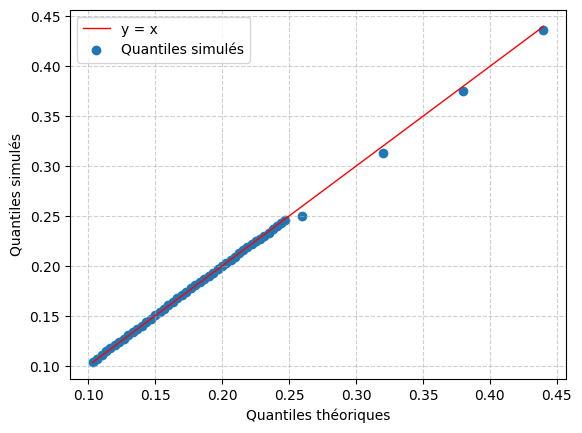

In [10]:
## QQ-plot
fig, ax = plt.subplots()
ax.plot([min(qth), max(qth)], [min(qth), max(qth)], 'r-', linewidth=1, label="y = x")  # Ligne de référence
ax.scatter(qth, qexp, label="Quantiles simulés")  # Scatter plot
ax.set_xlabel("Quantiles théoriques")
ax.set_ylabel("Quantiles simulés")
ax.legend()
ax.grid(True, linestyle='--', alpha=0.6)
plt.show()

## III - Simulation du tapis de feuilles mortes

<h1 style="font-family: Georgia, serif;font-size: 1em;margin-left: 3em;margin-right: 4em;"> 

---

On s'intéresse dorénavant à la simulation de tapis de feuilles mortes. On prend en particulier les valeurs suivantes pour les variables $\mathcal{D}$,$\mathcal{D}_{ext}$ et $\theta$.

---

</h1> 

In [11]:
## Taille des fenêtres
D=[-1,1]
Dext=[-2,2]

## Paramètre du processus de Poisson
theta=1

**Question 4.a.** Implémenter une fonction permettant de simuler la taille d'une feuille étant donnée sa couleur $i$, et les vecteurs $a,b\in\R^3$ définis à Q.3.b.

In [12]:
def simTaille(i, a, b):
    return np.random.uniform(a[i], b[i])

**Question 4.b.** Implémenter une fonction permettant de simuler la couleur d'une feuille étant donné le vecteur $p\in\R^3$ contenant les probabilités $p_i=\mathbb{P}(c(F)=i)$.

In [13]:
def simCouleur(p):
    return np.random.choice(len(p), p=p)

**Question 4.c.** Implémenter une fonction permettant de simuler la position d'une feuille étant donné le domaine $\mathcal{D}_{ext}$.

In [14]:
def simPosition(Dext):
    return np.random.uniform(Dext[0], Dext[1], size=2)

**Question 4.d.** Implémenter une fonction permettant de simuler le temps d'arrivée et les caractéristiques des feuilles tombant dans l'intervalle $[t_{\min},0[$, étant donnée une valeur de $t_{\min}<0$. La fonction devra retourner un tableau dont les colonnes contiennent, dans l'ordre, le temps d'arrivée, la position,la taille et la couleur des feuilles. On veillera à ce que les temps d'arrivées soient ordonnés dans l'ordre croissant.

*Indication: On pourra repartir de l'implémentation de la fonction permettant de simuler les temps d'arrivées et utiliser les fonctions implémentées aux Q.4.a-c.*

In [15]:
def simFeuilles(t_min,theta,p,a,b,Dext):
    temps_arrivee = simTempsArrivee(t_min, theta)
    N=len(temps_arrivee)
    feuilles = np.zeros((N, 5))

    for i in range(N):
        temps = temps_arrivee[i]
        position = simPosition(Dext)
        couleur = simCouleur(p)
        taille = simTaille(couleur, a, b)

        feuilles[i, 0] = temps  
        feuilles[i, 1:3] = position 
        feuilles[i, 3] = taille 
        feuilles[i, 4] = couleur
        
    feuilles = feuilles[feuilles[:, 0].argsort()]
    return feuilles

<h1 style="font-family: Georgia, serif;font-size: 1em;margin-left: 3em;margin-right: 4em;"> 

---

D'après le modèle des feuilles mortes, des feuilles sont censées tomber depuis le temps $t=-\infty$, ce qui supposerait d'appeler la fonction définie à la question précédente avec $t_{\min}=-\infty$. Ceci est bien sûr impossible en pratique. 

On s'intéresse maintenant à comment obtenir une simulation du modèle en temps (de calcul) fini.

---

</h1> 

**Question 5.** Générer des simulations pour $t_{\min}=-100$ et $t_{\min}=-500$. Le domaine $\mathcal{D}$ est-il entièrement recouvert? Quelle contradiction obtenons-nous avec les résultats obtenus en Q.2? Existe-t-il une valeur finie de $t_{\min}$ qui permettrait, presque-sûrement, de lever cette contradiction?

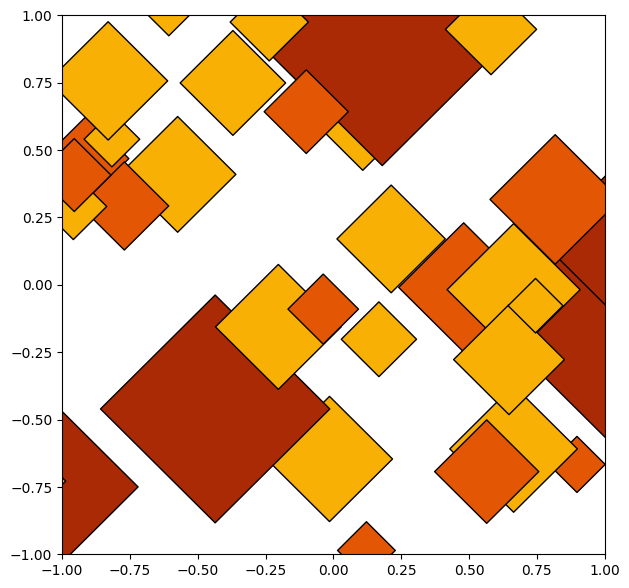

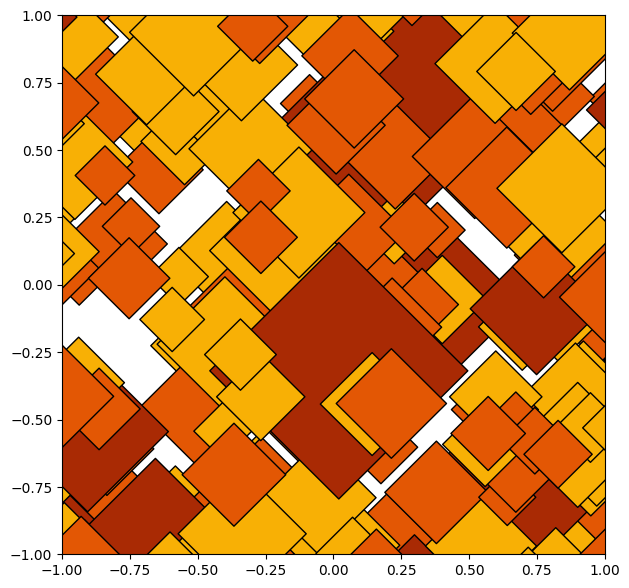


Avec t_min fini, il est impossible de garantir un recouvrement complet du domaine D, ce qui contredit les résultats théoriques obtenus pour t_min = −∞.
Il n'existe pas de valeur finie de t_min qui permette de lever cette contradiction de manière presque sûre.
Cependant, en choisissant une valeur de t_min suffisamment grande, on peut s'approcher d'un recouvrement complet avec une probabilité très élevée.



In [16]:
# Test: Simulation de tapis de feuilles

## t_min = -100
Sim_m100=simFeuilles(t_min=-100, theta = theta, p=p, a=a, b=b, Dext=Dext)
## Plot
plotSim(Sim_m100)

## t_min = -500
Sim_m500=simFeuilles(t_min=-500, theta = theta, p=p, a=a, b=b, Dext=Dext)
## Plot
plotSim(Sim_m500)

from IPython.display import display, Markdown

texte = """
Avec t_min fini, il est impossible de garantir un recouvrement complet du domaine D, ce qui contredit les résultats théoriques obtenus pour t_min = −∞.
Il n'existe pas de valeur finie de t_min qui permette de lever cette contradiction de manière presque sûre.
Cependant, en choisissant une valeur de t_min suffisamment grande, on peut s'approcher d'un recouvrement complet avec une probabilité très élevée.
"""

print(texte)



---

Pour lever la contradiction observée à la question précédente, on aurait besoin de déterminer a priori la valeur de $t_{\min}$ à partir de laquelle le sol est entièrement recouvert de feuilles. Cette valeur est aléatoire, car elle dépend des caractéristiques des feuilles qui tombent dans l'intervalle $[t_{\min},0[$. Afin de pouvoir tout de même accéder à une telle valeur, on se propose de considérer le modèle suivant.

Cette fois, on commence à $t=U_0=0$ avec un sol vide, et on fait tomber des feuilles selon un processus de Poisson $(U_i)_{i\in\mathbb{N}^*}$ sur $]0,\infty[$. Les caractéristiques des feuilles $F_i$ tombées à chaque instant $U_i$ sont déterminées de la même facon que pour le modèle des feuilles mortes. Soit $M = \inf\lbrace i \in\mathbb{N}^* : \mathcal{D}\subset\cup_{1\le k\le i} F_i  \rbrace$, c'est-à-dire l'indice (aléatoire) $M$ à partir duquel le sol est recouvert de feuilles.

---

</h1> 

**Question 6.a.** Soit $E \sim \mathcal{E}(\theta)$ indépendante des $U_i$. Pour $i\in\lbrace 1,...,M\rbrace$, on pose 
$$ T_{-i} = U_{M+1-i} - (U_M+E)$$
Montrer que les feuilles $(F_i)_{1\le i\le M}$ correspondent aux $M$ dernières feuilles d'un modèle des feuilles mortes ayant pour temps d'arrivée $(T_{-i})_{1\le i\le M}$ (i.e. $F_M$ arrive au temps $T_{-1}$, $F_{M-1}$ arrive au temps $T_{-2}$,...).

*Indication: On pourra utiliser la caractérisation des temps d'arrivée d'un modèles des feuilles mortes donnée en Q.1.dbis.*

**Réponse à la question 6.a.**

D'après la question **1.dbis (Bonus)**, les temps d'arrivée $(T_{-i})_{i \in \mathbb{N}^*}$ d'un modèle des feuilles mortes sont définis par :

$$
E_i = T_{-i+1} - T_{-i},
$$

où $(E_i)_{i \in \mathbb{N}^*}$ est une suite de variables aléatoires indépendantes et identiquement distribuées (i.i.d.) de loi exponentielle de paramètre $\theta$.

On définit les temps $T_{-i}$ pour $i \in \{1, \dots, M\}$ par :

$$
T_{-i} = U_{M+1-i} - (U_M + E).
$$

On observe que :
1. Les temps $T_{-i}$ sont ordonnés : $T_{-M} \leq T_{-M+1} \leq \dots \leq T_{-1} \leq 0$.
2. Les intervalles $E_i = T_{-i+1} - T_{-i}$ sont indépendants et suivent une loi exponentielle de paramètre $\theta$. En effet :
   - Les $U_i$ sont les temps d'arrivée d'un processus de Poisson, donc les intervalles $U_{i+1} - U_i$ sont i.i.d. de loi exponentielle de paramètre $\theta$.
   - La transformation linéaire $T_{-i} = U_{M+1-i} - (U_M + E)$ préserve cette propriété.

Ainsi, les temps $T_{-i}$ définis par $T_{-i} = U_{M+1-i} - (U_M + E)$ correspondent aux temps d'arrivée d'un modèle des feuilles mortes. Par conséquent, les feuilles $(F_i)_{1 \leq i \leq M}$ correspondent aux $M$ dernières feuilles de ce modèle, avec $F_M$ arrivant au temps $T_{-1}$, $F_{M-1}$ arrivant au temps $T_{-2}$, etc.



**Question 6.b.** En déduire une fonction permettant de simuler ces feuilles.

*Indication: Pour vérifier que les points du sol sont recouverts, on se contentera de vérifier que les points d'un maillage fin du sol, appelé Ddiscr dans le code ci-dessous, sont recouverts par une feuille*

In [17]:
## Maillage du sol
Ddiscr=np.stack(np.meshgrid(np.arange(D[0],D[1]+0.01,0.01),np.arange(D[0],D[1]+0.01,0.01)),axis=-1).reshape(-1,2)
Ddiscr[1:10,:]

array([[-0.99, -1.  ],
       [-0.98, -1.  ],
       [-0.97, -1.  ],
       [-0.96, -1.  ],
       [-0.95, -1.  ],
       [-0.94, -1.  ],
       [-0.93, -1.  ],
       [-0.92, -1.  ],
       [-0.91, -1.  ]])

In [18]:
def simFeuillesStop(theta, p, a, b, Dext):
    couverture = np.zeros(Ddiscr.shape[0], dtype=bool)
    temps_courant = 0.0
    feuilles = []
    U = []

    while not couverture.all():
        temps_inter_arrivees = np.random.exponential(1/theta)
        temps_courant += temps_inter_arrivees
        U.append(temps_courant)

        position = simPosition(Dext)
        couleur = simCouleur(p)
        taille = simTaille(couleur, a, b)

        dx = np.abs(Ddiscr[:, 0] - position[0])
        dy = np.abs(Ddiscr[:, 1] - position[1])
        masque = (dx + dy) <= taille  # Distance L1

        couverture = np.logical_or(couverture, masque)

        feuilles.append([temps_courant, position[0], position[1], taille, couleur])

    M = len(feuilles)
    E = np.random.exponential(1/theta)
    U_M = U[-1]

    Simulation = []
    for i in range(M):
        U_i = U[i]
        T_i = U_i - (U_M + E)
        Simulation.append([T_i, feuilles[i][1], feuilles[i][2], feuilles[i][3], feuilles[i][4]])

    Simulation = np.array(Simulation)
    Simulation = Simulation[Simulation[:, 0].argsort()]

    return Simulation

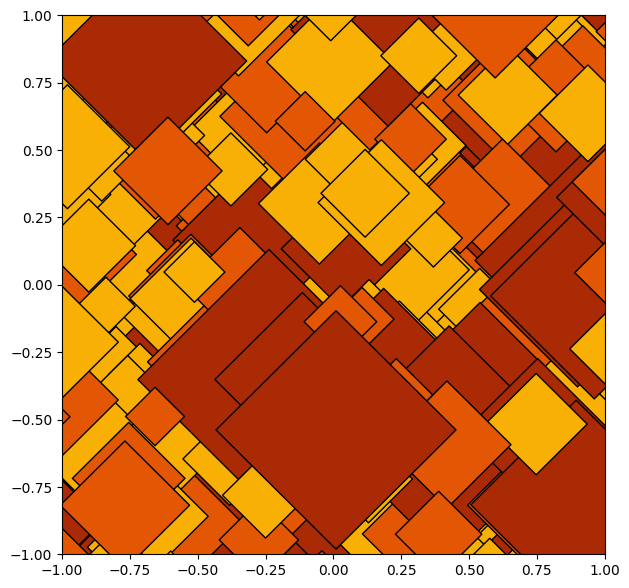

In [19]:
## Simulation du tapis de feuilles
Sim=simFeuillesStop(theta,p,a,b,Dext)
## Plot
plotSim(Sim)

**Question 6.c.**  Quelle est la distribution de la taille de la dernière feuille tombée sur le sol? La comparer, avec un QQ-plot, à la taille de la dernière feuille sur un échantillon de 1000 tapis de feuilles simulés avec la fonction créée à la question précédente. Que peut-on en conclure sur la méthode de simulation proposée?

Résumé statistique de derniere_taille :
Min : 0.10245971089278194
Max : 0.4986654750500953
Moyenne : 0.2690446339534388
Écart-type : 0.10686756285964162


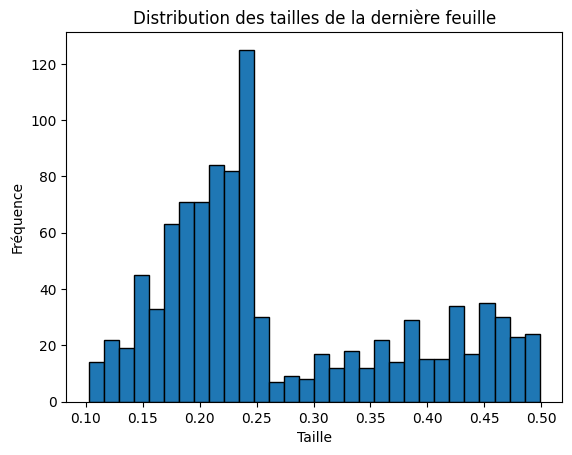

In [22]:
## Simulation des tapis et extraction de la taille de la dernière feuille
n_simulations = 1000
derniere_taille = np.zeros(n_simulations)

for i in range(n_simulations):
    Simulation = simFeuillesStop(theta,p,a,b,Dext)
    derniere_taille[i] = Simulation[-1,3]
print("Résumé statistique de derniere_taille :")
print("Min :", np.min(derniere_taille))
print("Max :", np.max(derniere_taille))
print("Moyenne :", np.mean(derniere_taille))
print("Écart-type :", np.std(derniere_taille))

plt.hist(derniere_taille, bins=30, edgecolor='black')
plt.title("Distribution des tailles de la dernière feuille")
plt.xlabel("Taille")
plt.ylabel("Fréquence")
plt.show()

In [23]:
## Quantiles théoriques 
rho_sim = [invF_rho(k/50, a, b, p) for k in range(50) for _ in range(1)]
qth = np.quantile(rho_sim, np.linspace(0, 1, 100))
print("Résumé statistique de qth :")
print("Min :", np.min(qth))
print("Max :", np.max(qth))
print("Moyenne :", np.mean(qth))
print("Écart-type :", np.std(qth))

## Quantiles des simulations
qexp=np.quantile(derniere_taille, np.linspace(0,1,100))
print("Résumé statistique de qexp :")
print("Min :", np.min(qexp))
print("Max :", np.max(qexp))
print("Moyenne :", np.mean(qexp))
print("Écart-type :", np.std(qexp))

Résumé statistique de qth :
Min : 0.1
Max : 0.4400000000008734
Moyenne : 0.18775651249338576
Écart-type : 0.0634935916490227
Résumé statistique de qexp :
Min : 0.10245971089278194
Max : 0.4986654750500953
Moyenne : 0.2693249202701494
Écart-type : 0.1081604357566747


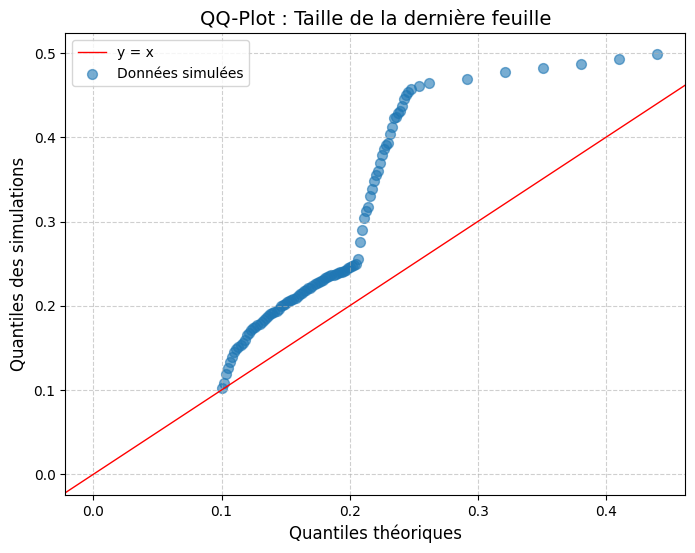

In [24]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.axline((0, 0), slope=1, linewidth=1, color='r', label="y = x")
ax.scatter(qth, qexp, s=50, alpha=0.6, label="Données simulées")
ax.set_xlabel("Quantiles théoriques", fontsize=12)
ax.set_ylabel("Quantiles des simulations", fontsize=12)
ax.set_title("QQ-Plot : Taille de la dernière feuille", fontsize=14)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.6)
plt.show()

texte = """
Le QQ-plot montre une divergence significative entre les tailles simulées de la dernière feuille et les tailles théoriques attendues. 
La méthode de simulation actuelle, bien que fonctionnelle pour générer un recouvrement complet, introduit un biais structurel en faussant la distribution des tailles.
"""
print(texte)




---

Face à cette nouvelle déconvenue, on adopte un point de vue différent sur le tapis de feuilles mortes. Jusqu'à maintenant, on observait les feuilles tomber et s'empiler (pendant un temps infini), sur le sol. Ainsi, à $t=T_0=0$, on observe, en vue de dessus notre tapis de feuilles mortes. 

Supposons désormais qu'il nous est possible d'observer le sol par en-dessous (par exemple, parce que le sol est en fait une verrière plane en dessous de laquelle on se trouve). Comme pour la question précédente,  on commence à $t=U_0=0$ avec un sol vide, et on fait tomber des feuilles selon un processus de Poisson $(U_i)_{i\in\mathbb{N}^*}$ sur $]0,\infty[$. Les caractéristiques des feuilles $F_i$ tombées à chaque instant $U_i$ sont déterminées de la même façon que pour le modèle des feuilles mortes et $M$ désigne une nouvelle fois l'indice (aléatoire) $M$ à partir duquel le sol est recouvert de feuilles.

Puisqu'on observe maintenant le sol par en-dessous, après l'instant $U_{M}$, le tapis ne change plus car le sol est recouvert de feuilles et donc les nouvelles feuilles qui tombent sont cachées par celle qui sont déjà présentes. Ainsi, contrairement à la construction précédente, le tapis est fixé à partir d'un certain temps. 

---

</h1> 


**Question 7.a.**  Pour $i\in\lbrace 1,...,M\rbrace$, on pose 
$$ T_{-i} = -U_{i}$$
Montrer qu'en associant la feuille $F_i$ au temps $T_{-i}$, les feuilles $(F_i)_{1\le i\le M}$ correspondent aux $M$ dernières feuilles d'un modèle des feuilles mortes.

**Réponse**

Pour montrer cela, utilisons à nouveau la caractérisation démontrée dans la question (1.dbis).

On observe que :
1. La suite $(T_{-i})_{i\in\mathbb{N}}$ est décroissante, car opposée à $(U_i)_{i\in\mathbb{N}}$, suite croissante : $T_{-M} \leq T_{-M+1} \leq \dots \leq T_{-1} \leq 0$,
2. Les intervalles $E_i = T_{-i+1} - T_{-i}$ sont indépendants et suivent une loi exponentielle de paramètre $\theta$. En effet :
   - Les $U_i$ sont les temps d'arrivée d'un processus de Poisson, donc les intervalles $U_{i+1} - U_i$ sont i.i.d. de loi exponentielle de paramètre $\theta$.
   - La transformation linéaire $T_{-i} = -U_i$ préserve cette propriété.

Ainsi, les temps $T_{-i}$ définis par $T_{-i} = -U_i$ correspondent aux temps d'arrivée d'un modèle des feuilles mortes. Par conséquent, les feuilles $(F_i)_{1 \leq i \leq M}$ correspondent aux $M$ dernières feuilles de ce modèle, avec $F_M$ arrivant au temps $T_{-1}$, $F_{M-1}$ arrivant au temps $T_{-2}$, etc.

**Question 7.b.** En déduire une fonction permettant de simuler ces feuilles. 

In [25]:
def simFeuillesDessous(theta,p,a,b,Dext):
    couverture = np.zeros(Ddiscr.shape[0], dtype=bool)
    temps_courant = 0.0
    feuilles= []
    U = []

    while not couverture.all():
        temps_inter_arrivees = np.random.exponential(1/theta)
        temps_courant += temps_inter_arrivees
        U.append(temps_courant)

        position = simPosition(Dext)
        couleur = simCouleur(p)
        taille = simTaille(couleur, a, b)

        dx = np.abs(Ddiscr[:, 0] - position[0])
        dy = np.abs(Ddiscr[:, 1] - position[1])
        masque = (dx + dy) <= taille  # Distance L1

        couverture = np.logical_or(couverture, masque)

        feuilles.append([temps_courant, position[0], position[1], taille, couleur])
        
    M = len(feuilles)
    feuilles_inversees = feuilles [::-1]
    temps_inverses = [ - feuille[0] for feuille in feuilles_inversees]

    Simulation = np.array([ [temps_inverses[i], feuilles_inversees[i][1], feuilles_inversees[i][2], feuilles_inversees[i][3], feuilles_inversees[i][4]] for i in range(M)])

    return Simulation



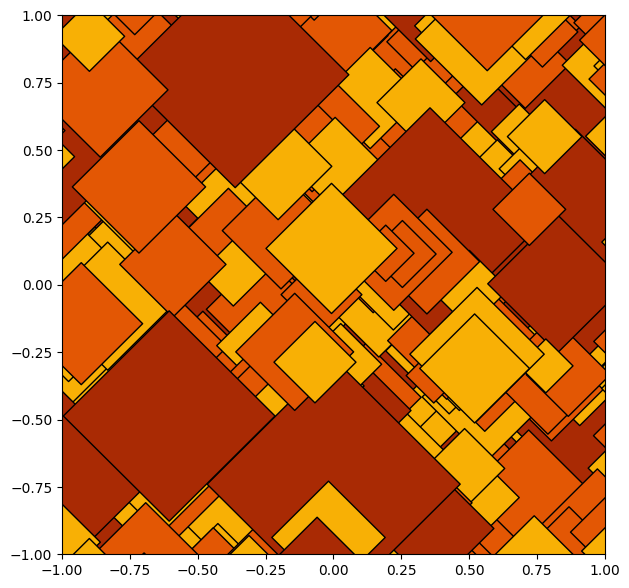

In [26]:
## Simulation et affichage
Sim = simFeuillesDessous(theta, p, a, b, Dext)
plotSim(Sim)

**Question 7.c.**  Comparer la distribution, avec un QQ-plot, de la taille de la dernière feuille tombée sur le sol à la taille de la dernière feuille sur un échantillon de 1000 tapis de feuilles simulés avec la fonction créée à la question précédente. Que peut-on en conclure sur la méthode de simulation proposée?

Résumé statistique de derniere_taille :
Min : 0.10003668399155904
Max : 0.49262079452627305
Moyenne : 0.19157047748496928
Écart-type : 0.06894959701020476


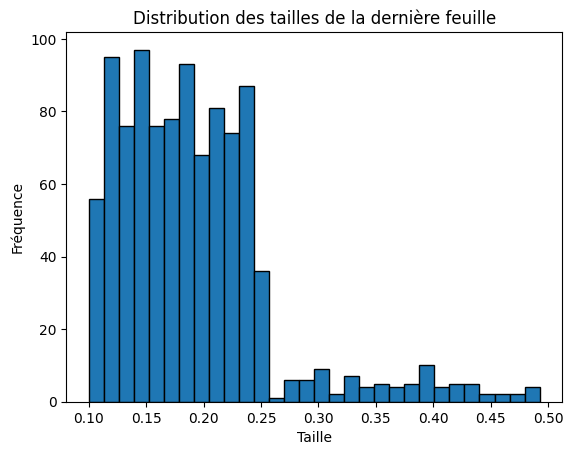

In [27]:
## Simulation des tapis et extraction de la taille de la dernière feuille
n_simulations = 1000
derniere_taille = np.zeros(n_simulations)

for i in range(n_simulations):
    Simulation = simFeuillesDessous(theta,p,a,b,Dext)
    derniere_taille[i] = Simulation[-1,3]
print("Résumé statistique de derniere_taille :")
print("Min :", np.min(derniere_taille))
print("Max :", np.max(derniere_taille))
print("Moyenne :", np.mean(derniere_taille))
print("Écart-type :", np.std(derniere_taille))

plt.hist(derniere_taille, bins=30, edgecolor='black')
plt.title("Distribution des tailles de la dernière feuille")
plt.xlabel("Taille")
plt.ylabel("Fréquence")
plt.show()


In [28]:
## Quantiles théoriques 
rho_sim = [invF_rho(np.random.uniform(0, 1), a, b, p) for _ in range(10000)]
qth = np.quantile(rho_sim, np.linspace(0, 1, 100))
print("Résumé statistique de qth :")
print("Min :", np.min(qth))
print("Max :", np.max(qth))
print("Moyenne :", np.mean(qth))
print("Écart-type :", np.std(qth))

## Quantiles des simulations
qexp=np.quantile(derniere_taille, np.linspace(0,1,100))
print("Résumé statistique de qexp :")
print("Min :", np.min(qexp))
print("Max :", np.max(qexp))
print("Moyenne :", np.mean(qexp))
print("Écart-type :", np.std(qexp))

Résumé statistique de qth :
Min : 0.10000374005612685
Max : 0.4999760457008961
Moyenne : 0.19176029171491982
Écart-type : 0.07368478755513452
Résumé statistique de qexp :
Min : 0.10003668399155904
Max : 0.49262079452627305
Moyenne : 0.19257023340184198
Écart-type : 0.07187804925381418


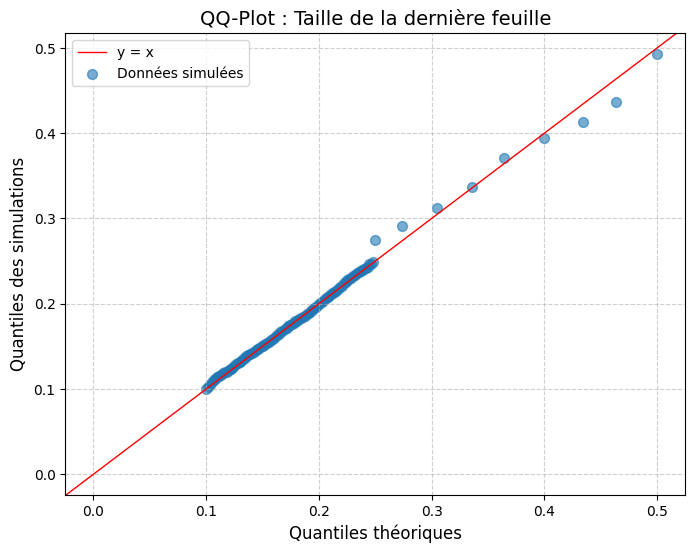

In [29]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.axline((0, 0), slope=1, linewidth=1, color='r', label="y = x")
ax.scatter(qth, qexp, s=50, alpha=0.6, label="Données simulées")
ax.set_xlabel("Quantiles théoriques", fontsize=12)
ax.set_ylabel("Quantiles des simulations", fontsize=12)
ax.set_title("QQ-Plot : Taille de la dernière feuille", fontsize=14)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.6)
plt.show()

**Question 7.cbis.(Bonus)** Montrer qu'avec ce modèle, on retrouve que la probabilité que la couleur du tapis au point $x_0\in\mathcal{D}$  soit $i$ est également donnée par
$$P(C(x_0)=i)=\frac{p_i r_i^2}{\sum_{j=1}^{N_c} p_jr_j^2}$$

**Réponse à la question 7.cbis (Bonus)**

Dans ce nouveau modèle, on observe le sol par en-dessous. Les feuilles tombent selon un processus de Poisson $(U_i)_{i \in \mathbb{N}^*}$ sur $]0, \infty[$.  
- Les feuilles $F_i$ tombent à des temps $U_i$.
- Si $F_i$ recouvre $x_0$, elle cache toutes les feuilles précédentes (observées par en-dessous).
- Ainsi, la couleur $C(x_0)$ est celle de la dernière feuille recouvrant $x_0$, avant $U_M$.

De plus, les caractéristiques des feuilles ($\chi(F_i)$, $c(F_i)$, $\rho(F_i)$) sont indépendantes de $U_i$ (par énoncé). Cela implique que :
- La probabilité qu'une feuille recouvre $x_0$ ne dépend pas de son temps d'arrivée.
- La couleur de la dernière feuille recouvrant $x_0$ suit la même loi que dans le modèle des feuilles mortes.

D'après la question 7.a), les feuilles $(F_i)_{1 \leq i \leq M}$ tombant à $U_1, U_2, \dots, U_M$ dans le nouveau modèle correspondent aux $M$ dernières feuilles tombant à $T_{-1}, T_{-2}, \dots, T_{-M}$ dans le modèle des feuilles mortes.

Ainsi, les résultats de la question 2 s'appliquent directement au nouveau modèle car :
1. **Indépendance des caractéristiques** :  
   Les caractéristiques $(\chi(F_i), c(F_i), \rho(F_i))$ sont indépendantes de $U_i$.  
   Ainsi, la probabilité qu'une feuille recouvre $x_0$ est la même dans les deux modèles.

2. **Dernière feuille recouvrant $x_0$** :  
   Dans le nouveau modèle, la couleur $C(x_0)$ est déterminée par la dernière feuille recouvrant $x_0$.  
   Dans le modèle des feuilles mortes, la couleur est également déterminée par la dernière feuille recouvrant $x_0$ (car les feuilles tombent depuis $t = -\infty$).

3. **Symétrie temporelle** :  
   Le processus de Poisson est réversible dans le temps. Inverser le temps ne change pas les propriétés statistiques du processus.

La probabilité que la couleur du tapis au point $x_0$ soit $i$ est donnée par :
$$
\mathbb{P}(C(x_0) = i) = \mathbb{P}(c(F) = i \mid x_0 \in F).
$$

puis en utilisant la formule de Bayes :
$$
\mathbb{P}(c(F) = i \mid x_0 \in F) = \frac{\mathbb{P}(x_0 \in F \mid c(F) = i) \cdot \mathbb{P}(c(F) = i)}{\mathbb{P}(x_0 \in F)},
$$

et en substituant les expressions connues :
$$
\mathbb{P}(C(x_0) = i) = \frac{\frac{r_i^2}{8} \cdot p_i}{\frac{1}{8} \sum_{j=0}^{N_c-1} p_j r_j^2} = \frac{p_i r_i^2}{\sum_{j=0}^{N_c-1} p_j r_j^2},
$$
ce qui conclut la démonstration. 

**Question 7.d.** Implémenter une fonction permettant, étant donné un ensemble de points $x_0\in\mathcal{D}$, de recalculer numériquement les probabilités $\mathbb{P}(C(x_0)=i)$ pour $i\in\lbrace 1, \dots, N_c\rbrace$ à partir de simulations de tapis (réalisées avec la fonction simFeuillesDessous). Appliquer cette fonction à l'ensemble de points $X_0$ défini dans le code et interpréter les résultats.

In [30]:
### Fonction de calcul des probabilités 
### X0 : Tableau contenant les coordonnées (sur chaque ligne) des points sur lequels on souhaite calculer les probabilités
### nsim : Nombre de simulations
def calcProb(X0, nsim):
    Nc = len(p)
    probabilités = np.zeros((X0.shape[0], Nc))
    for _ in range(nsim):
        simulation = simFeuillesDessous(theta, p, a, b, Dext)
        for i in range(X0.shape[0]):
            for feuille in simulation:  #
                x_feuille, y_feuille = feuille[1], feuille[2]
                taille = feuille[3]
                if (abs(X0[i][0] - x_feuille) + abs(X0[i][1] - y_feuille)) <= taille:
                    probabilités[i][int(feuille[4])] += 1
                    break  
    probabilités /= nsim
    return probabilités

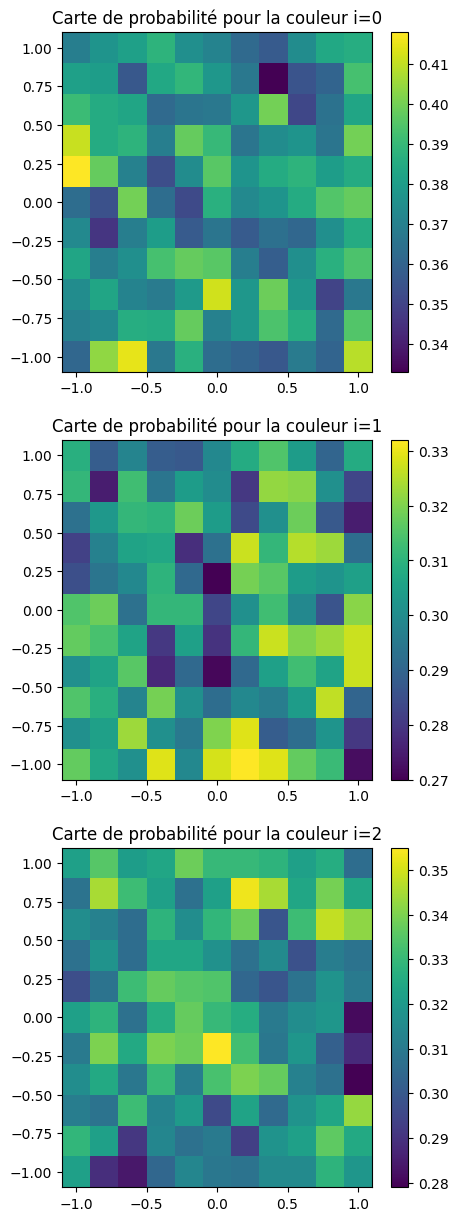

In [31]:
## Points sur lesquels évaluer les probabilités
X0=np.stack(np.meshgrid(np.arange(D[0],D[1]+0.2,0.2),np.arange(D[0],D[1]+0.2,0.2)),axis=-1).reshape(-1,2)

## Calcul et représentation
pvec=calcProb(X0,1000)
fig, ax = plt.subplots(3,1,figsize=(5,15))
Ngd=int(X0.shape[0]**0.5)
for i in range(Nc):
    im=ax[i].pcolormesh(X0[:,0].reshape((Ngd,Ngd)),X0[:,1].reshape((Ngd,Ngd)),pvec[:,i].reshape((Ngd,Ngd)))
    ax[i].set_title("Carte de probabilité pour la couleur i="+str(i))
    fig.colorbar(im)
plt.show()

**Interprétation :**
On voit que la répartition de chaque couleur est assez homogène. Cela montre que la probablité pur une feuille donnée d'avoir la couleur données ne dépend pas de sa position. De plus, la probabilité de chaque couleur se rapproche des valeurs données par la formule q7.c.bis. Notre modèle est donc cohérent avec la théorie. 

In [32]:
# Les valeurs simulés

np.average(pvec, axis=0)

array([0.3773719 , 0.30355372, 0.31907438])

In [33]:
# les valeurs théoriques

r_2 = [(b[i]**3 - a[i]**3)/(3 * (b[i] - a[i])) for i in range (3)]
S = sum([(p[i] *  r_2[i]) for i in range (3)])
P = np.array([(p[i] * r_2[i]) / S for i in range(3)])

P

array([0.38461538, 0.30769231, 0.30769231])

**Question 7.dbis.(Bonus)** Proposer un code permettant de simuler un tapis de feuille étant donnée qu'on fixe la couleur $i_0$ de la feuille au point $(0,0)$. Calculer numériquement les probabilités afin de valider les résultats de simulation.

| Couleur | Théorique | Simulé |
|---------|-----------|--------|
|      0 | 0.455     | 0.390  |
|      1 | 0.364     | 0.319  |
|      2 | 0.182     | 0.291  |


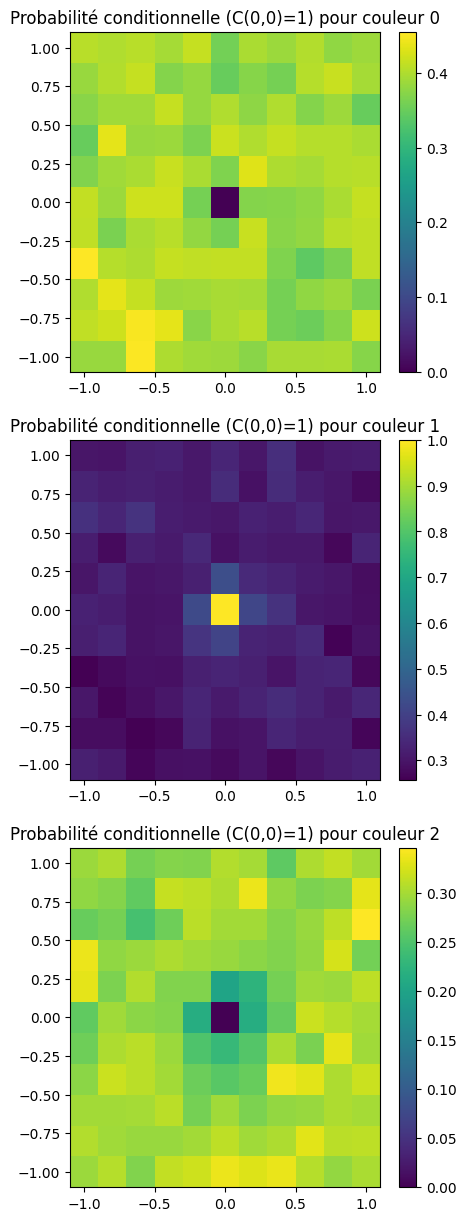

In [35]:
def get_color_at_00(simulation):
    for feuille in reversed(simulation):
        x, y, taille = feuille[1], feuille[2], feuille[3]
        if (abs(x) + abs(y)) <= taille:
            return int(feuille[4])
    return None 


def simFeuillesDessousCond(i0, theta, p, a, b, Dext, max_attempts=1000):
    for _ in range(max_attempts):
        simulation = simFeuillesDessous(theta, p, a, b, Dext)
        if get_color_at_00(simulation) == i0:
            return simulation
    raise RuntimeError(f"Aucune simulation valide trouvée après {max_attempts} tentatives")

def calcProbCond(X0, nsim, i0):
    Nc = len(p)
    probas = np.zeros((X0.shape[0], Nc))
    
    for _ in range(nsim):
        sim = simFeuillesDessousCond(i0, theta, p, a, b, Dext)
        
        for idx, (x, y) in enumerate(X0):
            for feuille in reversed(sim):
                fx, fy, taille = feuille[1], feuille[2], feuille[3]
                if (abs(x - fx) + abs(y - fy)) <= taille:
                    probas[idx, int(feuille[4])] += 1
                    break
                    
    return probas / nsim

# Paramètres théoriques
r = [np.sqrt(a[j] + (b[j] - a[j])/2) for j in range(len(p))]
denom = sum(p[j] * r[j]**2 for j in range(len(p)))
theoretical = [ (p[j] * r[j]**2)/denom for j in range(len(p)) ]

# Calcul pratique
i0 = 1  
nsim = 500  
pvec_cond = calcProbCond(X0, nsim, i0)

# Affichage des résultats
print("| Couleur | Théorique | Simulé |")
print("|---------|-----------|--------|")
for j in range(len(p)):
    sim_val = np.mean(pvec_cond[:,j])
    print(f"| {j:6} | {theoretical[j]:.3f}| {sim_val:.3f}  |")

fig, ax = plt.subplots(3,1,figsize=(5,15))
for i in range(Nc):
    im = ax[i].pcolormesh(X0[:,0].reshape((Ngd,Ngd)), 
                          X0[:,1].reshape((Ngd,Ngd)), 
                          pvec_cond[:,i].reshape((Ngd,Ngd)))
    ax[i].set_title(f"Probabilité conditionnelle (C(0,0)={i0}) pour couleur {i}")
    fig.colorbar(im, ax=ax[i])
plt.show()